<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


import numpy as np
import datetime

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX


mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
VN30_df = pd.read_csv('./data/VN30_price.csv', index_col=0, parse_dates=True)

In [3]:
VN30_df.count()

BID     1500
BVH     1500
CTG     1500
FPT     1500
GAS     1500
HPG     1500
KDH     1500
MBB     1500
MSN     1500
MWG     1500
NVL     1500
PDR     1500
PNJ     1500
REE     1500
SBT     1500
SSI     1500
STB     1500
TCH     1500
VCB     1500
VIC     1500
VNM     1500
VN30    1500
dtype: int64

In [4]:
VN30_df.head(5)

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2016-12-30,10531.3,58200.0,15050.0,15852.0,60600.0,6770.2,9221.5,5151.6,43200.0,18328.0,...,22097.6,24650.0,20035.1,9521.4,9450.0,12181.1,26307.0,34711.0,99213.0,628.21
2017-01-03,11235.8,59300.0,16100.0,16158.2,60100.0,6903.6,9198.4,5059.6,43600.0,18411.0,...,22164.0,25000.0,21261.8,9740.0,8790.0,12181.1,27643.0,34380.0,100082.0,633.89
2017-01-04,11458.3,60100.0,16400.0,16302.3,61500.0,6903.6,9198.4,5004.4,42333.0,18481.0,...,22230.5,25000.0,20771.1,9740.0,8200.0,12109.0,27457.0,34752.0,100240.0,632.70
2017-01-05,11421.2,61100.0,16500.0,16248.3,61500.0,6919.3,8944.8,4967.6,42067.0,18540.0,...,22263.7,25300.0,20607.6,9764.3,8580.0,12289.2,27569.0,34959.0,100082.0,634.83
2017-01-06,11680.8,61400.0,16650.0,16194.3,60400.0,6809.4,9083.2,5059.6,42133.0,18540.0,...,22895.1,25000.0,20525.8,9861.4,8780.0,12217.1,28125.0,35620.0,99529.0,636.34


In [5]:
VN30_df.tail(5)

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2022-12-26,38800.0,45500.0,26050.0,76400.0,102600.0,17100.0,24650.0,16800.0,91500.0,42600.0,...,81000.0,70300.0,13750.0,17050.0,21900.0,6480.0,78900.0,52900.0,76000.0,987.77
2022-12-27,40000.0,46500.0,26600.0,76500.0,103100.0,18250.0,26350.0,17250.0,91600.0,43800.0,...,81000.0,72000.0,13850.0,18200.0,22500.0,6900.0,79100.0,53400.0,76600.0,1007.36
2022-12-28,41900.0,46700.0,27150.0,76700.0,103000.0,18200.0,27050.0,17450.0,93000.0,43000.0,...,82500.0,71800.0,14300.0,18150.0,22900.0,6900.0,80000.0,53500.0,77000.0,1013.95
2022-12-29,40000.0,46500.0,27000.0,76200.0,102600.0,18000.0,27950.0,17400.0,94000.0,42900.0,...,86000.0,71800.0,14500.0,17600.0,22350.0,6860.0,80700.0,53600.0,77000.0,1008.30
2022-12-30,38600.0,46600.0,27250.0,76900.0,101500.0,18000.0,26500.0,17100.0,93000.0,42900.0,...,89900.0,71500.0,14500.0,17700.0,22500.0,6790.0,80000.0,53800.0,76100.0,1005.19


In [6]:
VN30_df.isna().sum()

BID     0
BVH     0
CTG     0
FPT     0
GAS     0
HPG     0
KDH     0
MBB     0
MSN     0
MWG     0
NVL     0
PDR     0
PNJ     0
REE     0
SBT     0
SSI     0
STB     0
TCH     0
VCB     0
VIC     0
VNM     0
VN30    0
dtype: int64

In [7]:
VN30_df.dropna(inplace=True)

In [8]:
VN30_df.count()

BID     1500
BVH     1500
CTG     1500
FPT     1500
GAS     1500
HPG     1500
KDH     1500
MBB     1500
MSN     1500
MWG     1500
NVL     1500
PDR     1500
PNJ     1500
REE     1500
SBT     1500
SSI     1500
STB     1500
TCH     1500
VCB     1500
VIC     1500
VNM     1500
VN30    1500
dtype: int64

In [9]:
VN30_df = VN30_df.replace(',','', regex=True)
VN30_df = VN30_df.replace('%','', regex=True)
VN30_df = VN30_df.replace('K','', regex=True)
VN30_df = VN30_df.replace('k','', regex=True)
VN30_df = VN30_df.replace('M','', regex=True)
VN30_df = VN30_df.replace('m','', regex=True)


In [10]:
for col in VN30_df.columns:
    VN30_df[col] = VN30_df[col].astype(np.float32)

In [11]:
VN30_df

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2016-12-30,10531.299805,58200.0,15050.0,15852.000000,60600.0,6770.200195,9221.500000,5151.600098,43200.0,18328.0,...,22097.599609,24650.0,20035.099609,9521.400391,9450.0,12181.099609,26307.0,34711.0,99213.0,628.210022
2017-01-03,11235.799805,59300.0,16100.0,16158.200195,60100.0,6903.600098,9198.400391,5059.600098,43600.0,18411.0,...,22164.000000,25000.0,21261.800781,9740.000000,8790.0,12181.099609,27643.0,34380.0,100082.0,633.890015
2017-01-04,11458.299805,60100.0,16400.0,16302.299805,61500.0,6903.600098,9198.400391,5004.399902,42333.0,18481.0,...,22230.500000,25000.0,20771.099609,9740.000000,8200.0,12109.000000,27457.0,34752.0,100240.0,632.700012
2017-01-05,11421.200195,61100.0,16500.0,16248.299805,61500.0,6919.299805,8944.799805,4967.600098,42067.0,18540.0,...,22263.699219,25300.0,20607.599609,9764.299805,8580.0,12289.200195,27569.0,34959.0,100082.0,634.830017
2017-01-06,11680.799805,61400.0,16650.0,16194.299805,60400.0,6809.399902,9083.200195,5059.600098,42133.0,18540.0,...,22895.099609,25000.0,20525.800781,9861.400391,8780.0,12217.099609,28125.0,35620.0,99529.0,636.340027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,38800.000000,45500.0,26050.0,76400.000000,102600.0,17100.000000,24650.000000,16800.000000,91500.0,42600.0,...,81000.000000,70300.0,13750.000000,17050.000000,21900.0,6480.000000,78900.0,52900.0,76000.0,987.770020
2022-12-27,40000.000000,46500.0,26600.0,76500.000000,103100.0,18250.000000,26350.000000,17250.000000,91600.0,43800.0,...,81000.000000,72000.0,13850.000000,18200.000000,22500.0,6900.000000,79100.0,53400.0,76600.0,1007.359985
2022-12-28,41900.000000,46700.0,27150.0,76700.000000,103000.0,18200.000000,27050.000000,17450.000000,93000.0,43000.0,...,82500.000000,71800.0,14300.000000,18150.000000,22900.0,6900.000000,80000.0,53500.0,77000.0,1013.950012
2022-12-29,40000.000000,46500.0,27000.0,76200.000000,102600.0,18000.000000,27950.000000,17400.000000,94000.0,42900.0,...,86000.000000,71800.0,14500.000000,17600.000000,22350.0,6860.000000,80700.0,53600.0,77000.0,1008.299988


In [12]:
VN30_df.columns

Index(['BID', 'BVH', 'CTG', 'FPT', 'GAS', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG',
       'NVL', 'PDR', 'PNJ', 'REE', 'SBT', 'SSI', 'STB', 'TCH', 'VCB', 'VIC',
       'VNM', 'VN30'],
      dtype='object')

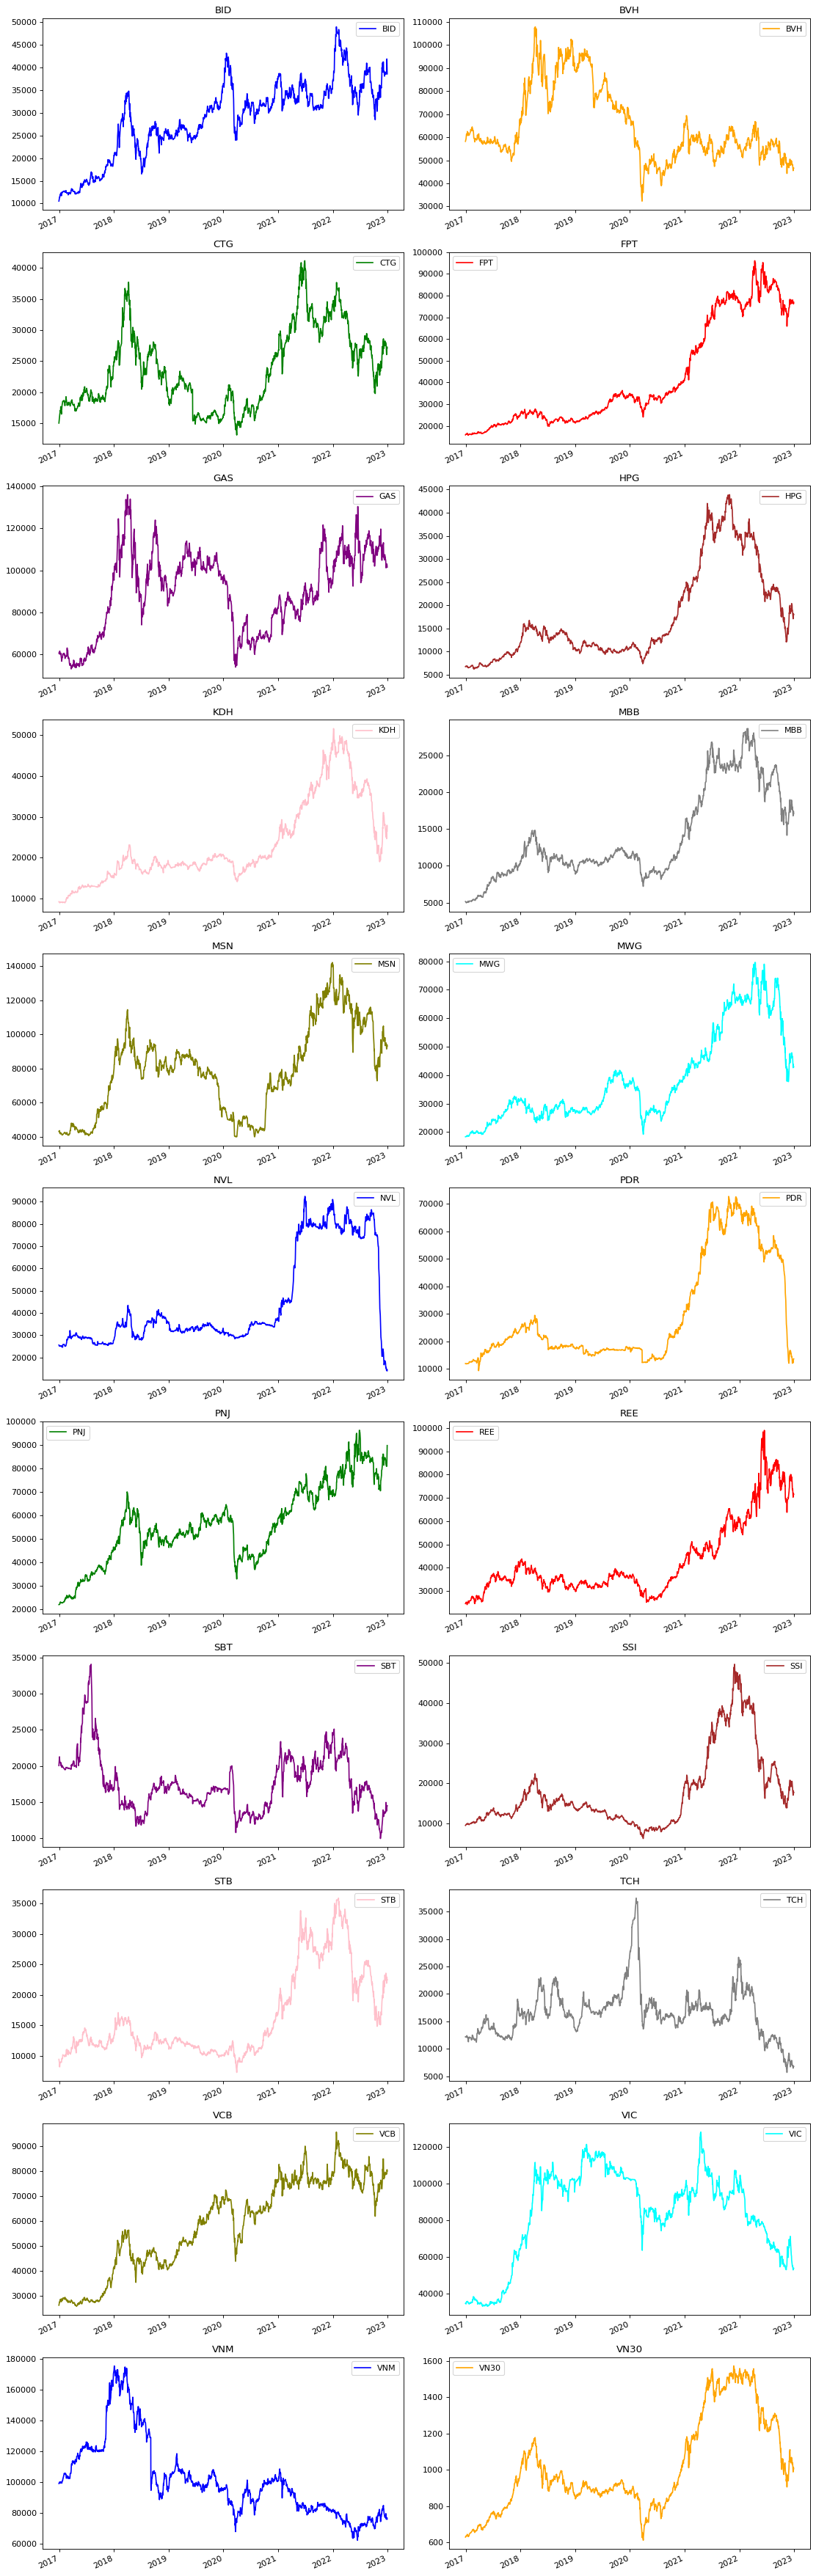

In [13]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(data.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    # print('feature size ', feature_size)
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        # print(i//2, i%2)
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(VN30_df)

In [14]:
VN30_df.index

DatetimeIndex(['2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=1500, freq=None)

<Axes: >

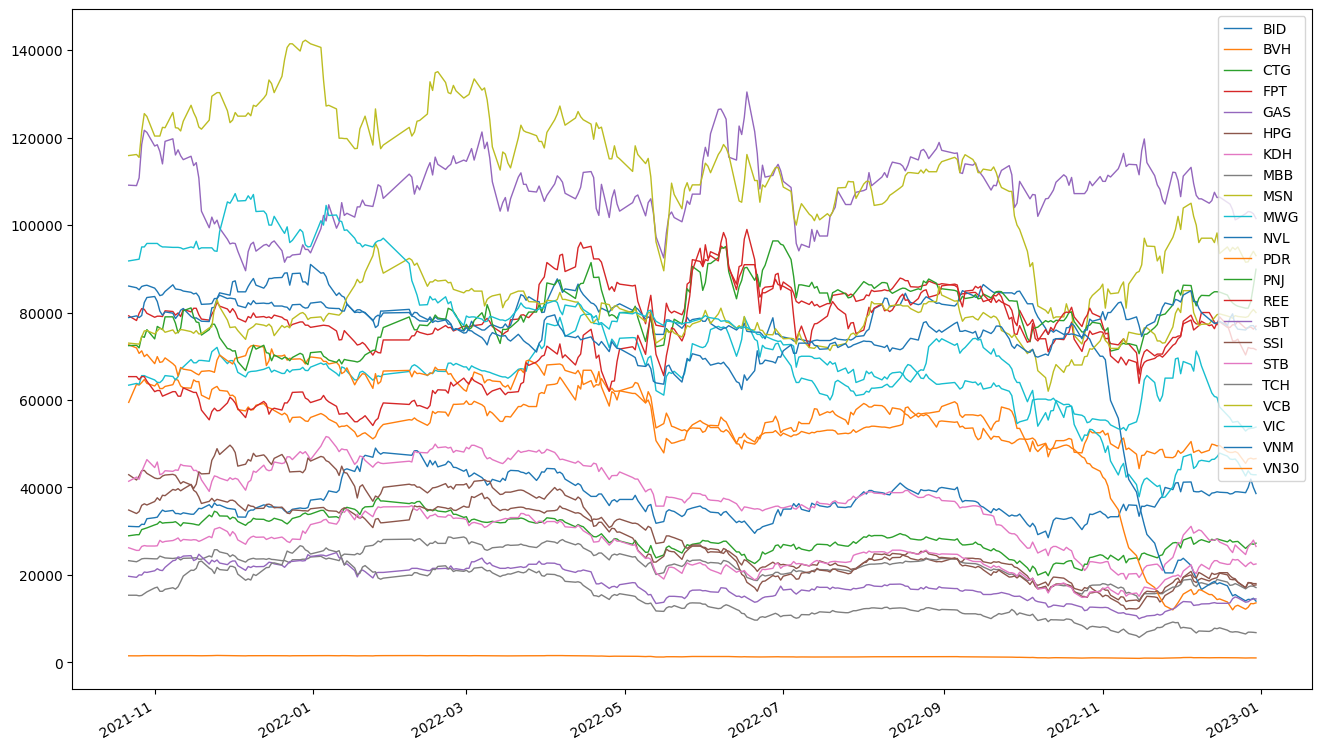

In [15]:
VN30_df[-300:].plot(figsize=(16, 10), linewidth=1)

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [16]:
def check_stationary(df):
  for i in range(len(df.columns)):
    print(f'============Testing stationary for {df.columns[i]} series ==========')
    result = adfuller(df[df.columns[i]], autolag="AIC")
    print('ADF Statistic: %d' % result[0])
    print('p-value: %f' % result[1])
    print('number of lag %f' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
    
    print(result[1])
    if result[1] > 0.05 :
      print('===> {} - Series is not Stationary'.format(df.columns[i]))
    else:
      print('{} - Series is Stationary'.format(df.columns[i]))

In [17]:
copy_df = VN30_df.copy()

In [18]:
origin_df = VN30_df.copy()

In [19]:
for i in range(len(copy_df.columns)):
    result = adfuller(copy_df[copy_df.columns[i]])
    if result[1] > 0.05 :
        copy_df[copy_df.columns[i]] = copy_df[copy_df.columns[i]] - copy_df[copy_df.columns[i]].shift(1)
            # copy_df.fillna(method='ffill', inplace=True)
copy_df.dropna(inplace=True)

In [20]:
copy_df

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2017-01-03,704.500000,1100.0,1050.0,306.200195,-500.0,133.399902,-23.099609,-92.000000,400.0,83.0,...,66.400391,350.0,1226.701172,218.599609,-660.0,12181.099609,1336.0,-331.0,869.0,5.679993
2017-01-04,222.500000,800.0,300.0,144.099609,1400.0,0.000000,0.000000,-55.200195,-1267.0,70.0,...,66.500000,0.0,-490.701172,0.000000,-590.0,12109.000000,-186.0,372.0,158.0,-1.190002
2017-01-05,-37.099609,1000.0,100.0,-54.000000,0.0,15.699707,-253.600586,-36.799805,-266.0,59.0,...,33.199219,300.0,-163.500000,24.299805,380.0,12289.200195,112.0,207.0,-158.0,2.130005
2017-01-06,259.599609,300.0,150.0,-54.000000,-1100.0,-109.899902,138.400391,92.000000,66.0,0.0,...,631.400391,-300.0,-81.798828,97.100586,200.0,12217.099609,556.0,661.0,-553.0,1.510010
2017-01-09,333.700195,200.0,450.0,90.000000,100.0,-39.199707,0.000000,-18.399902,-400.0,-129.0,...,332.300781,-100.0,-81.800781,97.199219,210.0,12397.299805,594.0,82.0,0.0,2.059998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-200.000000,-2400.0,-1600.0,-1600.000000,1100.0,-1250.000000,-1600.000000,-950.000000,-3500.0,-3200.0,...,-450.000000,-3600.0,-1000.000000,-1250.000000,-1600.0,6480.000000,-200.0,-2200.0,-200.0,-46.359985
2022-12-27,1200.000000,1000.0,550.0,100.000000,500.0,1150.000000,1700.000000,450.000000,100.0,1200.0,...,0.000000,1700.0,100.000000,1150.000000,600.0,6900.000000,200.0,500.0,600.0,19.589966
2022-12-28,1900.000000,200.0,550.0,200.000000,-100.0,-50.000000,700.000000,200.000000,1400.0,-800.0,...,1500.000000,-200.0,450.000000,-50.000000,400.0,6900.000000,900.0,100.0,400.0,6.590027
2022-12-29,-1900.000000,-200.0,-150.0,-500.000000,-400.0,-200.000000,900.000000,-50.000000,1000.0,-100.0,...,3500.000000,0.0,200.000000,-550.000000,-550.0,6860.000000,700.0,100.0,0.0,-5.650024


In [21]:
check_stationary(copy_df)

============Testing stationary for BID series ==========
ADF Statistic: -39
p-value: 0.000000
number of lag 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
0.0
BID - Series is Stationary
============Testing stationary for BVH series ==========
ADF Statistic: -14
p-value: 0.000000
number of lag 9.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
1.0771720711259161e-26
BVH - Series is Stationary
============Testing stationary for CTG series ==========
ADF Statistic: -40
p-value: 0.000000
number of lag 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
0.0
CTG - Series is Stationary
============Testing stationary for FPT series ==========
ADF Statistic: -9
p-value: 0.000000
number of lag 22.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
1.7017353402077204e-16
FPT - Series is Stationary
============Testing stationary for GAS series ==========
ADF Statistic: -28
p-value: 0.000000
number of lag 1.000000
Critical Values:
	1%: -3.435
	5%: -2.

In [22]:
copy_df.head(5)

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2017-01-03,704.500000,1100.0,1050.0,306.200195,-500.0,133.399902,-23.099609,-92.000000,400.0,83.0,...,66.400391,350.0,1226.701172,218.599609,-660.0,12181.099609,1336.0,-331.0,869.0,5.679993
2017-01-04,222.500000,800.0,300.0,144.099609,1400.0,0.000000,0.000000,-55.200195,-1267.0,70.0,...,66.500000,0.0,-490.701172,0.000000,-590.0,12109.000000,-186.0,372.0,158.0,-1.190002
2017-01-05,-37.099609,1000.0,100.0,-54.000000,0.0,15.699707,-253.600586,-36.799805,-266.0,59.0,...,33.199219,300.0,-163.500000,24.299805,380.0,12289.200195,112.0,207.0,-158.0,2.130005
2017-01-06,259.599609,300.0,150.0,-54.000000,-1100.0,-109.899902,138.400391,92.000000,66.0,0.0,...,631.400391,-300.0,-81.798828,97.100586,200.0,12217.099609,556.0,661.0,-553.0,1.510010
2017-01-09,333.700195,200.0,450.0,90.000000,100.0,-39.199707,0.000000,-18.399902,-400.0,-129.0,...,332.300781,-100.0,-81.800781,97.199219,210.0,12397.299805,594.0,82.0,0.0,2.059998


In [23]:
df = copy_df

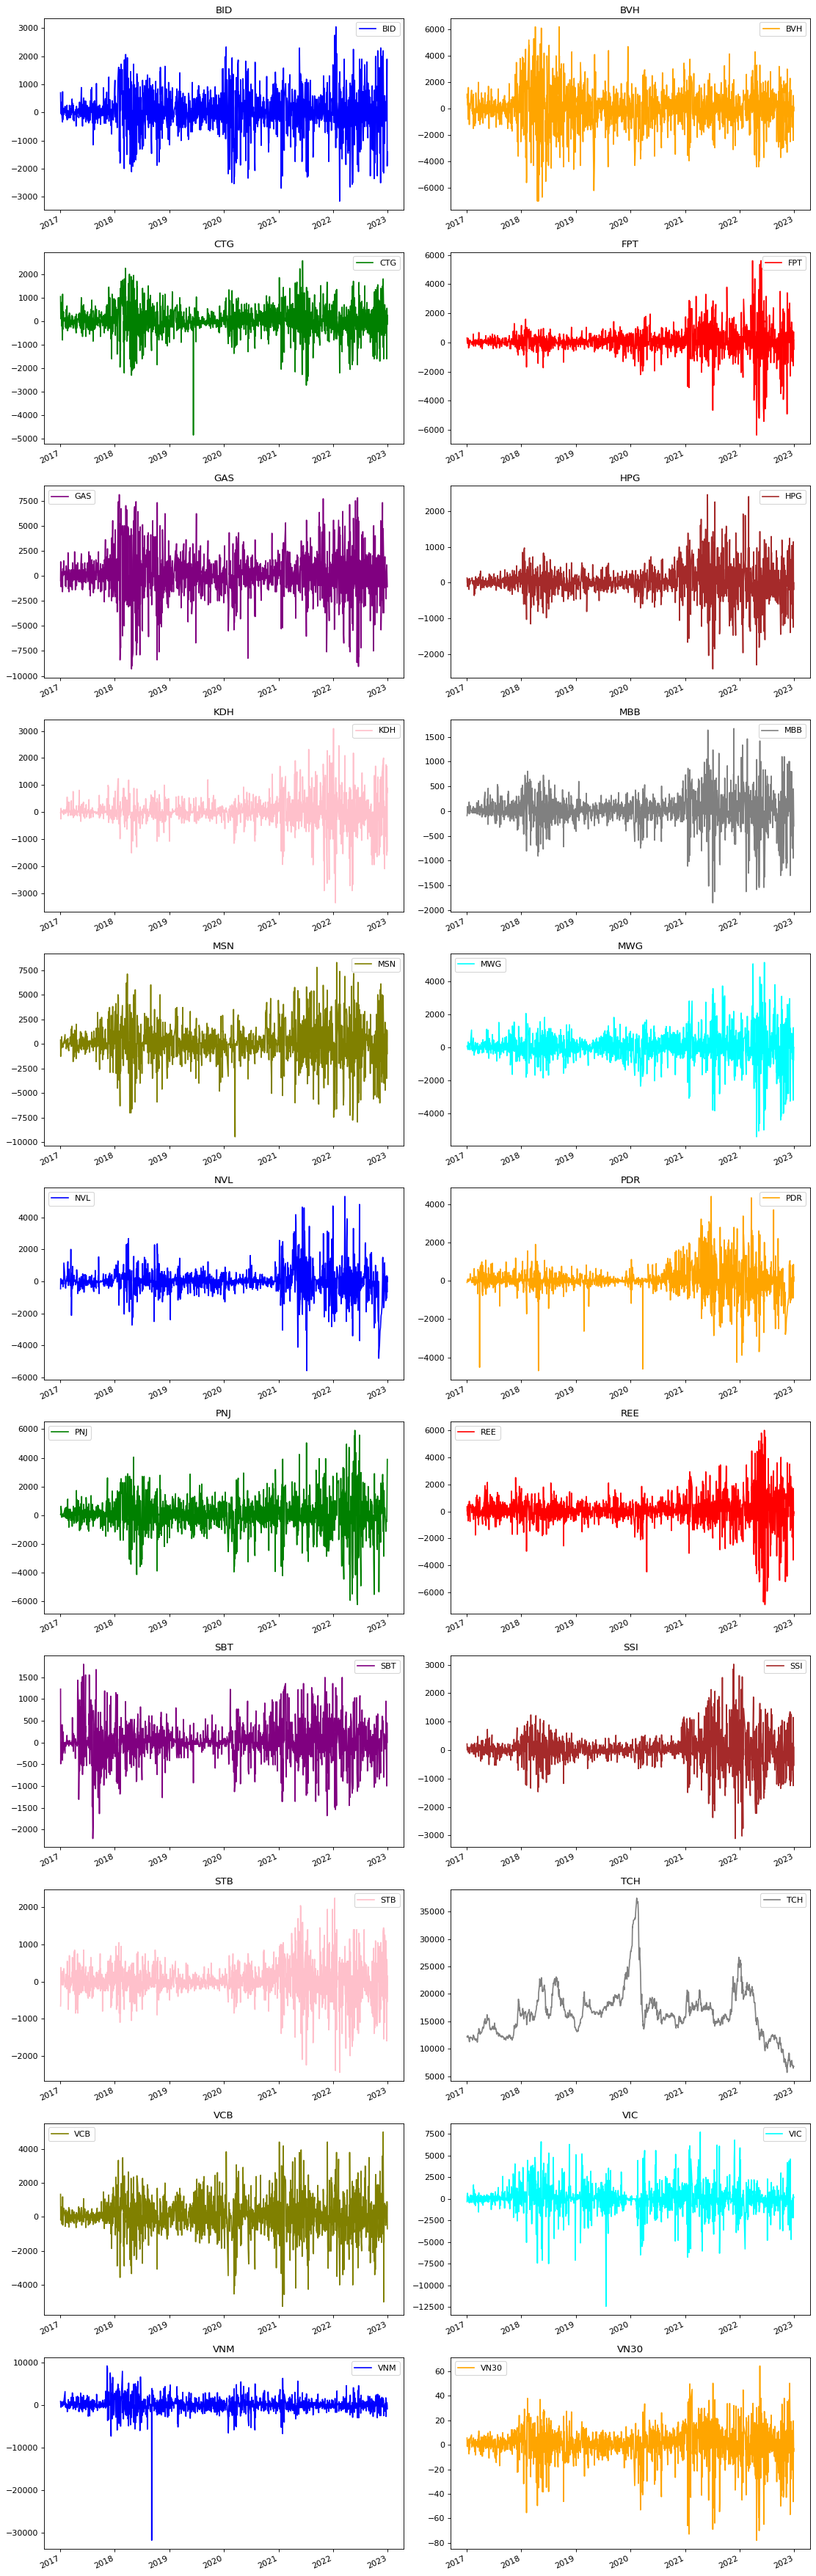

In [24]:
Visualize(df)

 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [25]:
max_lags=12
y='Price'

In [26]:
df.columns

Index(['BID', 'BVH', 'CTG', 'FPT', 'GAS', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG',
       'NVL', 'PDR', 'PNJ', 'REE', 'SBT', 'SSI', 'STB', 'TCH', 'VCB', 'VIC',
       'VNM', 'VN30'],
      dtype='object')

In [28]:
# for y in df.columns:
#     print('Causal test', y)
#     for i in range(0,len(df.columns)):
#         results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
#         p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
#         print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

In [ ]:
maxlag=12
test = 'ssr_ftest'
def grangers_causality_matrix(X_train, variables, test = 'ssr_ftest', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.max(p_values)
            dataset.loc[r,c] = str(p_values)
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
grangers_causality_matrix(df, variables = df.columns, test=test)


/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but ran

,BID_x,BVH_x,CTG_x,FPT_x,GAS_x,HPG_x,KDH_x,MBB_x,MSN_x,MWG_x,...,PNJ_x,REE_x,SBT_x,SSI_x,STB_x,TCH_x,VCB_x,VIC_x,VNM_x,VN30_x
BID_y,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9625, 0.6094, 0.1523, 0.2332, 0.2307, 0.241...","[0.4806, 0.3681, 0.3648, 0.4985, 0.6325, 0.699...","[0.4898, 0.0061, 0.0136, 0.0111, 0.0138, 0.012...","[0.7322, 0.755, 0.2745, 0.0694, 0.0208, 0.0395...","[0.1368, 0.2062, 0.3252, 0.359, 0.1887, 0.2735...","[0.2146, 0.1793, 0.2028, 0.329, 0.4194, 0.3628...","[0.3562, 0.1003, 0.1891, 0.2676, 0.371, 0.3199...","[0.0968, 0.2487, 0.2043, 0.0743, 0.0335, 0.031...","[0.2168, 0.0016, 0.0034, 0.0046, 0.0062, 0.004...",...,"[0.5965, 0.8217, 0.8973, 0.9564, 0.9742, 0.989...","[0.4645, 0.0001, 0.0002, 0.0001, 0.0001, 0.000...","[0.43, 0.4185, 0.428, 0.4476, 0.6225, 0.6018, ...","[0.0537, 0.0776, 0.077, 0.044, 0.012, 0.0231, ...","[0.9887, 0.9406, 0.5683, 0.2248, 0.2812, 0.376...","[0.3054, 0.1701, 0.2224, 0.3702, 0.1853, 0.251...","[0.0668, 0.063, 0.1254, 0.1128, 0.1775, 0.1162...","[0.5215, 0.0838, 0.1615, 0.284, 0.1312, 0.2032...","[0.9454, 0.8208, 0.9402, 0.9865, 0.9881, 0.973...","[0.4555, 0.6258, 0.7926, 0.6529, 0.6995, 0.771..."
BVH_y,"[0.316, 0.1546, 0.2487, 0.2187, 0.3148, 0.3713...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0696, 0.0081, 0.0216, 0.0149, 0.0307, 0.039...","[0.2393, 0.351, 0.5334, 0.5433, 0.6495, 0.7271...","[0.0081, 0.0157, 0.0265, 0.013, 0.0004, 0.0004...","[0.1628, 0.2474, 0.3391, 0.4519, 0.6001, 0.670...","[0.9802, 0.7563, 0.8391, 0.8943, 0.9542, 0.977...","[0.0135, 0.0384, 0.0766, 0.0878, 0.1372, 0.164...","[0.048, 0.1037, 0.2136, 0.0916, 0.0756, 0.0173...","[0.1723, 0.0851, 0.1313, 0.1331, 0.0846, 0.108...",...,"[0.0024, 0.0092, 0.015, 0.0308, 0.0519, 0.0806...","[0.9161, 0.4137, 0.6002, 0.7644, 0.7883, 0.756...","[0.5403, 0.7325, 0.7312, 0.6696, 0.7266, 0.795...","[0.0081, 0.019, 0.0423, 0.071, 0.0763, 0.0623,...","[0.5779, 0.82, 0.7636, 0.8517, 0.7331, 0.795, ...","[0.0799, 0.2209, 0.3549, 0.4811, 0.4081, 0.371...","[0.0355, 0.0152, 0.044, 0.0733, 0.1101, 0.1362...","[0.0228, 0.0173, 0.0346, 0.0207, 0.039, 0.0317...","[0.2344, 0.4862, 0.6678, 0.7831, 0.8394, 0.926...","[0.0098, 0.0152, 0.0309, 0.0307, 0.0401, 0.053..."
CTG_y,"[0.3555, 0.632, 0.8194, 0.9349, 0.9226, 0.8584...","[0.5444, 0.706, 0.4154, 0.6519, 0.1834, 0.2669...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.7951, 0.0202, 0.0509, 0.1018, 0.1698, 0.239...","[0.2852, 0.0873, 0.1635, 0.0355, 0.0497, 0.079...","[0.5787, 0.1501, 0.2858, 0.1489, 0.1421, 0.172...","[0.8304, 0.0234, 0.0512, 0.0762, 0.0742, 0.056...","[0.2988, 0.0457, 0.0888, 0.1398, 0.1617, 0.241...","[0.8654, 0.1831, 0.1323, 0.2254, 0.3361, 0.221...","[0.0624, 0.0002, 0.0002, 0.0003, 0.0007, 0.000...",...,"[0.4103, 0.5812, 0.4767, 0.5731, 0.0251, 0.04,...","[0.8566, 0.0004, 0.0006, 0.0013, 0.0026, 0.003...","[0.0293, 0.0691, 0.1432, 0.2508, 0.3734, 0.441...","[0.0479, 0.1025, 0.0303, 0.0696, 0.0941, 0.151...","[0.7839, 0.8399, 0.8466, 0.7402, 0.7797, 0.486...","[0.5895, 0.6718, 0.7868, 0.9076, 0.8801, 0.333...","[0.4885, 0.0448, 0.0564, 0.0848, 0.1433, 0.188...","[0.4207, 0.1663, 0.3071, 0.4856, 0.219, 0.1896...","[0.9019, 0.4375, 0.4921, 0.6789, 0.6609, 0.761...","[0.7453, 0.4487, 0.5863, 0.4571, 0.5209, 0.648..."
FPT_y,"[0.0035, 0.0131, 0.0308, 0.056, 0.0071, 0.0124...","[0.2638, 0.4664, 0.5201, 0.5431, 0.0369, 0.066...","[0.291, 0.3723, 0.1122, 0.1649, 0.0434, 0.0639...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.3732, 0.4908, 0.6772, 0.3051, 0.3762, 0.196...","[0.3687, 0.5008, 0.6072, 0.7556, 0.6633, 0.805...","[0.1117, 0.4397, 0.5504, 0.7056, 0.0736, 0.010...","[0.529, 0.6894, 0.7443, 0.1026, 0.0076, 0.0106...","[0.7904, 0.9569, 0.9452, 0.8917, 0.9072, 0.229...","[0.192, 0.2927, 0.4594, 0.5216, 0.4761, 0.4272...",...,"[0.4091, 0.3763, 0.5504, 0.4373, 0.2716, 0.411...","[0.3229, 0.4941, 0.5682, 0.4889, 0.4554, 0.303...","[0.9212, 0.53, 0.6802, 0.8131, 0.543, 0.7506, ...","[0.0794, 0.1402, 0.2469, 0.1319, 0.05

In [ ]:
max_lags = 12
y = 'VN30'
for i in range(0,len(df.columns)):
  results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Column - BID : P_Values - [0.4095, 0.6733, 0.3049, 0.4058, 0.4743, 0.5954, 0.6598, 0.6622, 0.6596, 0.5825, 0.668, 0.6272]
Column - BVH : P_Values - [0.7692, 0.7504, 0.1259, 0.1227, 0.1153, 0.1804, 0.2527, 0.316, 0.3807, 0.0427, 0.0424, 0.0471]
Column - CTG : P_Values - [0.4536, 0.2105, 0.0559, 0.0164, 0.025, 0.0425, 0.0596, 0.079, 0.0588, 0.0814, 0.0464, 0.0706]
Column - FPT : P_Values - [0.1271, 0.0015, 0.0037, 0.0066, 0.0109, 0.0205, 0.0394, 0.0495, 0.0166, 0.0207, 0.0184, 0.0136]
Column - GAS : P_Values - [0.1966, 0.2625, 0.3701, 0.0051, 0.005, 0.0034, 0.0051, 0.0084, 0.0137, 0.0116, 0.0187, 0.0175]
Column - HPG : P_Values - [0.2457, 0.1543, 0.2962, 0.2322, 0.3453, 0.4093, 0.1984, 0.2289, 0.1996, 0.2819, 0.0734, 0.0947]
Column - KDH : P_Values - [0.2094, 0.0175, 0.0314, 0.0377, 0.0399, 0.0223, 0.0418, 0.0457, 0.0917, 0.0588, 0.0471, 0.0376]
Column - MBB : P_Values - [0.4381, 0.5394, 0.3756, 0.3731, 0.2629, 0.3381, 0.0753, 0.1143, 0.132, 0.0094, 0.0026, 0.0025]
Column - MSN : P_Value

In [ ]:
df

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2017-01-03,704.500000,1100.0,1050.0,306.200195,-500.0,133.399902,-23.099609,-92.000000,400.0,83.0,...,66.400391,350.0,1226.701172,218.599609,-660.0,12181.099609,1336.0,-331.0,869.0,5.679993
2017-01-04,222.500000,800.0,300.0,144.099609,1400.0,0.000000,0.000000,-55.200195,-1267.0,70.0,...,66.500000,0.0,-490.701172,0.000000,-590.0,12109.000000,-186.0,372.0,158.0,-1.190002
2017-01-05,-37.099609,1000.0,100.0,-54.000000,0.0,15.699707,-253.600586,-36.799805,-266.0,59.0,...,33.199219,300.0,-163.500000,24.299805,380.0,12289.200195,112.0,207.0,-158.0,2.130005
2017-01-06,259.599609,300.0,150.0,-54.000000,-1100.0,-109.899902,138.400391,92.000000,66.0,0.0,...,631.400391,-300.0,-81.798828,97.100586,200.0,12217.099609,556.0,661.0,-553.0,1.510010
2017-01-09,333.700195,200.0,450.0,90.000000,100.0,-39.199707,0.000000,-18.399902,-400.0,-129.0,...,332.300781,-100.0,-81.800781,97.199219,210.0,12397.299805,594.0,82.0,0.0,2.059998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-200.000000,-2400.0,-1600.0,-1600.000000,1100.0,-1250.000000,-1600.000000,-950.000000,-3500.0,-3200.0,...,-450.000000,-3600.0,-1000.000000,-1250.000000,-1600.0,6480.000000,-200.0,-2200.0,-200.0,-46.359985
2022-12-27,1200.000000,1000.0,550.0,100.000000,500.0,1150.000000,1700.000000,450.000000,100.0,1200.0,...,0.000000,1700.0,100.000000,1150.000000,600.0,6900.000000,200.0,500.0,600.0,19.589966
2022-12-28,1900.000000,200.0,550.0,200.000000,-100.0,-50.000000,700.000000,200.000000,1400.0,-800.0,...,1500.000000,-200.0,450.000000,-50.000000,400.0,6900.000000,900.0,100.0,400.0,6.590027
2022-12-29,-1900.000000,-200.0,-150.0,-500.000000,-400.0,-200.000000,900.000000,-50.000000,1000.0,-100.0,...,3500.000000,0.0,200.000000,-550.000000,-550.0,6860.000000,700.0,100.0,0.0,-5.650024


In [29]:
origin_df = origin_df[df.columns]
nobs = 6
df_train = origin_df[:-nobs]
df_test = origin_df[-nobs:]

nobs = len(df_test)

print(df_train.shape) 
print(df_test.shape)

(1494, 22)
(6, 22)


In [32]:
model = VARMAX(df, enforce_stationarity=True)
fitted = model.fit(disp=False)
print(fitted.summary())

/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                                Statespace Model Results                                                                                               
Dep. Variable:     ['BID', 'BVH', 'CTG', 'FPT', 'GAS', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PNJ', 'REE', 'SBT', 'SSI', 'STB', 'TCH', 'VCB', 'VIC', 'VNM', 'VN30']   No. Observations:                 1499
Model:                                                                                                                                                                  VAR(1)   Log Likelihood             -254496.602
                                                                                                                                                                   + intercept   AIC                         510511.204
Date:                                                                                                                                   

In [34]:
df[:int(len(df)*0.8)]

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2017-01-03,704.500000,1100.0,1050.000000,306.200195,-500.0,133.399902,-23.099609,-92.000000,400.0,83.0,...,66.400391,350.0,1226.701172,218.599609,-660.0,12181.099609,1336.0,-331.0,869.000000,5.679993
2017-01-04,222.500000,800.0,300.000000,144.099609,1400.0,0.000000,0.000000,-55.200195,-1267.0,70.0,...,66.500000,0.0,-490.701172,0.000000,-590.0,12109.000000,-186.0,372.0,158.000000,-1.190002
2017-01-05,-37.099609,1000.0,100.000000,-54.000000,0.0,15.699707,-253.600586,-36.799805,-266.0,59.0,...,33.199219,300.0,-163.500000,24.299805,380.0,12289.200195,112.0,207.0,-158.000000,2.130005
2017-01-06,259.599609,300.0,150.000000,-54.000000,-1100.0,-109.899902,138.400391,92.000000,66.0,0.0,...,631.400391,-300.0,-81.798828,97.100586,200.0,12217.099609,556.0,661.0,-553.000000,1.510010
2017-01-09,333.700195,200.0,450.000000,90.000000,100.0,-39.199707,0.000000,-18.399902,-400.0,-129.0,...,332.300781,-100.0,-81.800781,97.199219,210.0,12397.299805,594.0,82.0,0.000000,2.059998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-15,-39.500000,-99.0,48.800781,82.296875,682.0,378.398438,46.000000,-83.300781,-910.0,-547.0,...,-366.000000,0.0,-186.900391,-222.199219,450.0,15389.000000,-155.0,100.0,0.000000,1.459961
2021-10-18,-158.300781,-197.0,-439.199219,82.406250,4380.0,454.101562,409.000000,0.000000,1655.0,-844.0,...,-1097.000000,860.0,-514.000000,88.898438,50.0,15118.299805,-387.0,0.0,-190.195312,5.650024
2021-10-19,593.500000,1775.0,97.599609,-329.500000,-1947.0,-529.800781,227.000000,-166.699219,-1655.0,-497.0,...,-732.000000,687.0,186.900391,44.398438,-700.0,14937.799805,310.0,-200.0,475.398438,-3.300049
2021-10-20,-237.398438,-887.0,-292.800781,-823.703125,0.0,-227.000000,-227.000000,0.000000,1738.0,-249.0,...,732.000000,86.0,-186.900391,-533.097656,100.0,15028.000000,-1084.0,-100.0,-285.203125,-2.159912


In [75]:
# import pickle

# # save the trained model as an H5 file
# filename = './save/var_multistock_model.pkl'
# pickle.dump(fitted_model, open(filename, 'wb'))

In [37]:
def adjust(val, length= 6): return str(val).ljust(length)

Kiểm nghiệm Durbin Watson cho việc kiểm định tính tương quan chuỗi cho phần dư của mô hình 

In [38]:
lag_order = model.k_ar
print(lag_order) 


1


In [39]:
import random
nobs = lag_order
# start_index = random.randint(lag_order+1, len(origin_df) - nobs-1)
start_index = len(origin_df) - lag_order
df_train = origin_df[:start_index]
df_test = origin_df[start_index:start_index+nobs]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(1499, 22)
(1, 22)


In [40]:
# lag_order = fitted_model.k_ar
# print(lag_order)  #> 5

# Input data for forecasting
# forecast_input = df.values[-lag_order:]
forecast_input = df.values[(start_index - lag_order - 1):start_index - 1]
forecast_input

array([[-1.9000000e+03, -2.0000000e+02, -1.5000000e+02, -5.0000000e+02,
        -4.0000000e+02, -2.0000000e+02,  9.0000000e+02, -5.0000000e+01,
         1.0000000e+03, -1.0000000e+02,  3.0000000e+02, -5.0000000e+01,
         3.5000000e+03,  0.0000000e+00,  2.0000000e+02, -5.5000000e+02,
        -5.5000000e+02,  6.8600000e+03,  7.0000000e+02,  1.0000000e+02,
         0.0000000e+00, -5.6500244e+00]], dtype=float32)

In [41]:
df[(start_index - lag_order-1):start_index-1]

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2022-12-29,-1900.0,-200.0,-150.0,-500.0,-400.0,-200.0,900.0,-50.0,1000.0,-100.0,...,3500.0,0.0,200.0,-550.0,-550.0,6860.0,700.0,100.0,0.0,-5.650024


In [42]:
df_test

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2022-12-30,38600.0,46600.0,27250.0,76900.0,101500.0,18000.0,26500.0,17100.0,93000.0,42900.0,...,89900.0,71500.0,14500.0,17700.0,22500.0,6790.0,80000.0,53800.0,76100.0,1005.190002


In [43]:
len(df_test)

1

In [64]:
fc = fitted.predict(len(df), len(df)+6)

/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [65]:
fc

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
1499,234.794651,556.948809,34.851202,475.342068,872.395404,211.549870,131.182040,19.861705,798.886294,563.861604,...,660.537650,293.456262,-23.971076,138.837520,-50.282578,6757.674254,-108.471879,741.558309,632.846928,6.946059
1500,-8.940266,185.724413,-6.497076,41.058511,326.159075,1.153249,62.231109,-9.789274,416.166249,40.939321,...,160.303158,121.267813,-3.972254,25.269472,-15.828248,6791.445443,67.397863,196.412338,282.465033,0.733089
1501,53.605721,153.416557,21.013108,65.100970,252.924043,13.984387,20.778574,8.876117,232.671858,-16.455196,...,158.942189,93.099739,-2.905870,38.395516,11.785692,6836.947768,87.108000,193.360123,285.654009,1.046686
1502,60.456123,152.476179,27.516249,64.107861,249.095200,19.119114,29.943737,12.641865,220.282135,-12.535676,...,163.002097,83.964804,0.948496,45.822635,13.824034,6884.848914,101.030822,205.456230,305.646970,1.206275
1503,60.207821,153.068484,27.323659,62.702174,246.762430,18.918793,29.365523,12.864971,218.697968,-12.596497,...,162.096026,83.782760,1.267776,45.811656,14.349422,6933.057403,100.217951,200.193064,304.921696,1.196077
1504,60.010077,152.019966,27.236176,62.560903,245.564154,18.851527,29.154460,12.848356,217.246349,-12.515982,...,161.520370,83.488869,1.233414,45.505338,14.338712,6981.046093,99.674060,199.169805,303.375035,1.190426
1505,59.792370,151.211009,27.143545,62.450749,244.464891,18.803537,29.081724,12.819256,216.356747,-12.358047,...,160.930673,83.221991,1.206092,45.309120,14.307966,7028.782594,99.349274,198.302519,301.833489,1.185922


In [63]:
len(fc)

1

In [53]:
fc = fitted.predict(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index, columns=df.columns + '_1d')
df_forecast

,BID_1d,BVH_1d,CTG_1d,FPT_1d,GAS_1d,HPG_1d,KDH_1d,MBB_1d,MSN_1d,MWG_1d,...,PNJ_1d,REE_1d,SBT_1d,SSI_1d,STB_1d,TCH_1d,VCB_1d,VIC_1d,VNM_1d,VN30_1d
2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_train['VN30'].iloc[-1]

1008.3

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
df_results

,BID_1d,BVH_1d,CTG_1d,FPT_1d,GAS_1d,HPG_1d,KDH_1d,MBB_1d,MSN_1d,MWG_1d,...,PNJ_forecast,REE_forecast,SBT_forecast,SSI_forecast,STB_forecast,TCH_forecast,VCB_forecast,VIC_forecast,VNM_forecast,VN30_forecast
2022-12-30,251.136588,733.678242,56.066186,301.089687,1078.902209,159.879059,127.521998,157.057257,994.077057,586.200959,...,86364.610837,72110.510272,14399.737014,17743.507233,22387.418397,13760.32593,80588.049658,54108.670449,77298.597962,1015.127321


In [ ]:
df_test

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2022-12-30,38600.0,46600.0,27250.0,76900.0,101500.0,18000.0,26500.0,17100.0,93000.0,42900.0,...,89900.0,71500.0,14500.0,17700.0,22500.0,6790.0,80000.0,53800.0,76100.0,1005.190002


In [ ]:
df_test_1 = df_test.copy()

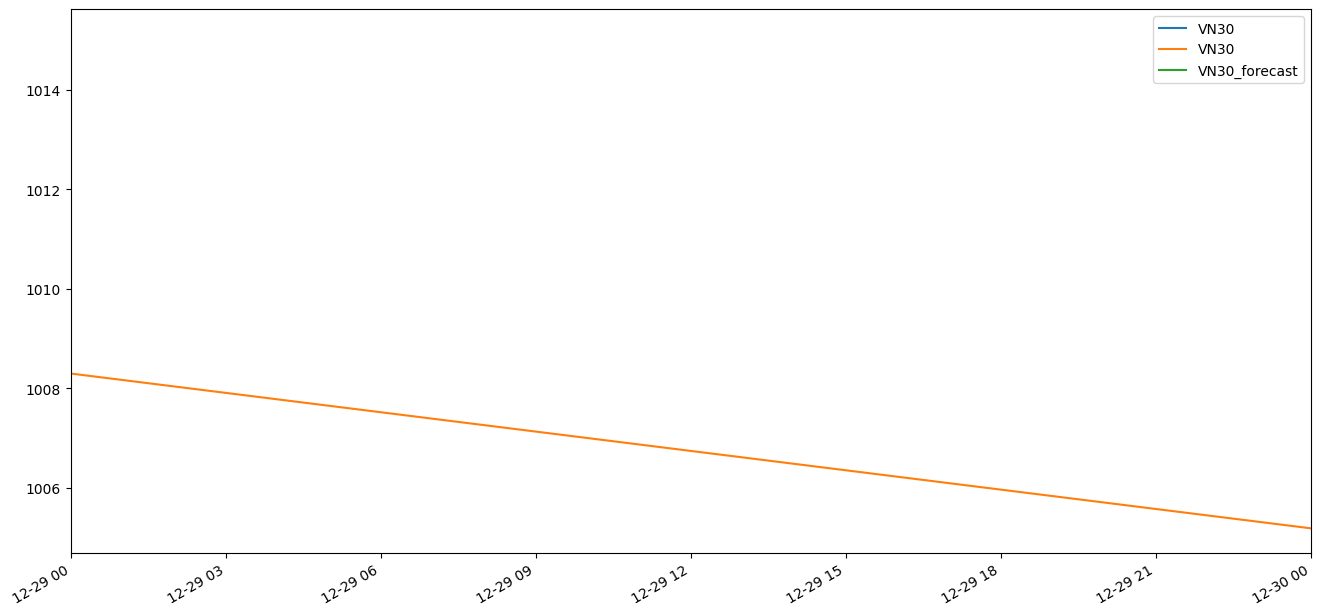

In [ ]:
col = 'VN30'
df_test['VN30'][-nobs:].plot(legend=True)
origin_df['VN30'][start_index-1:start_index+1].plot(legend=True)

df_results[col+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

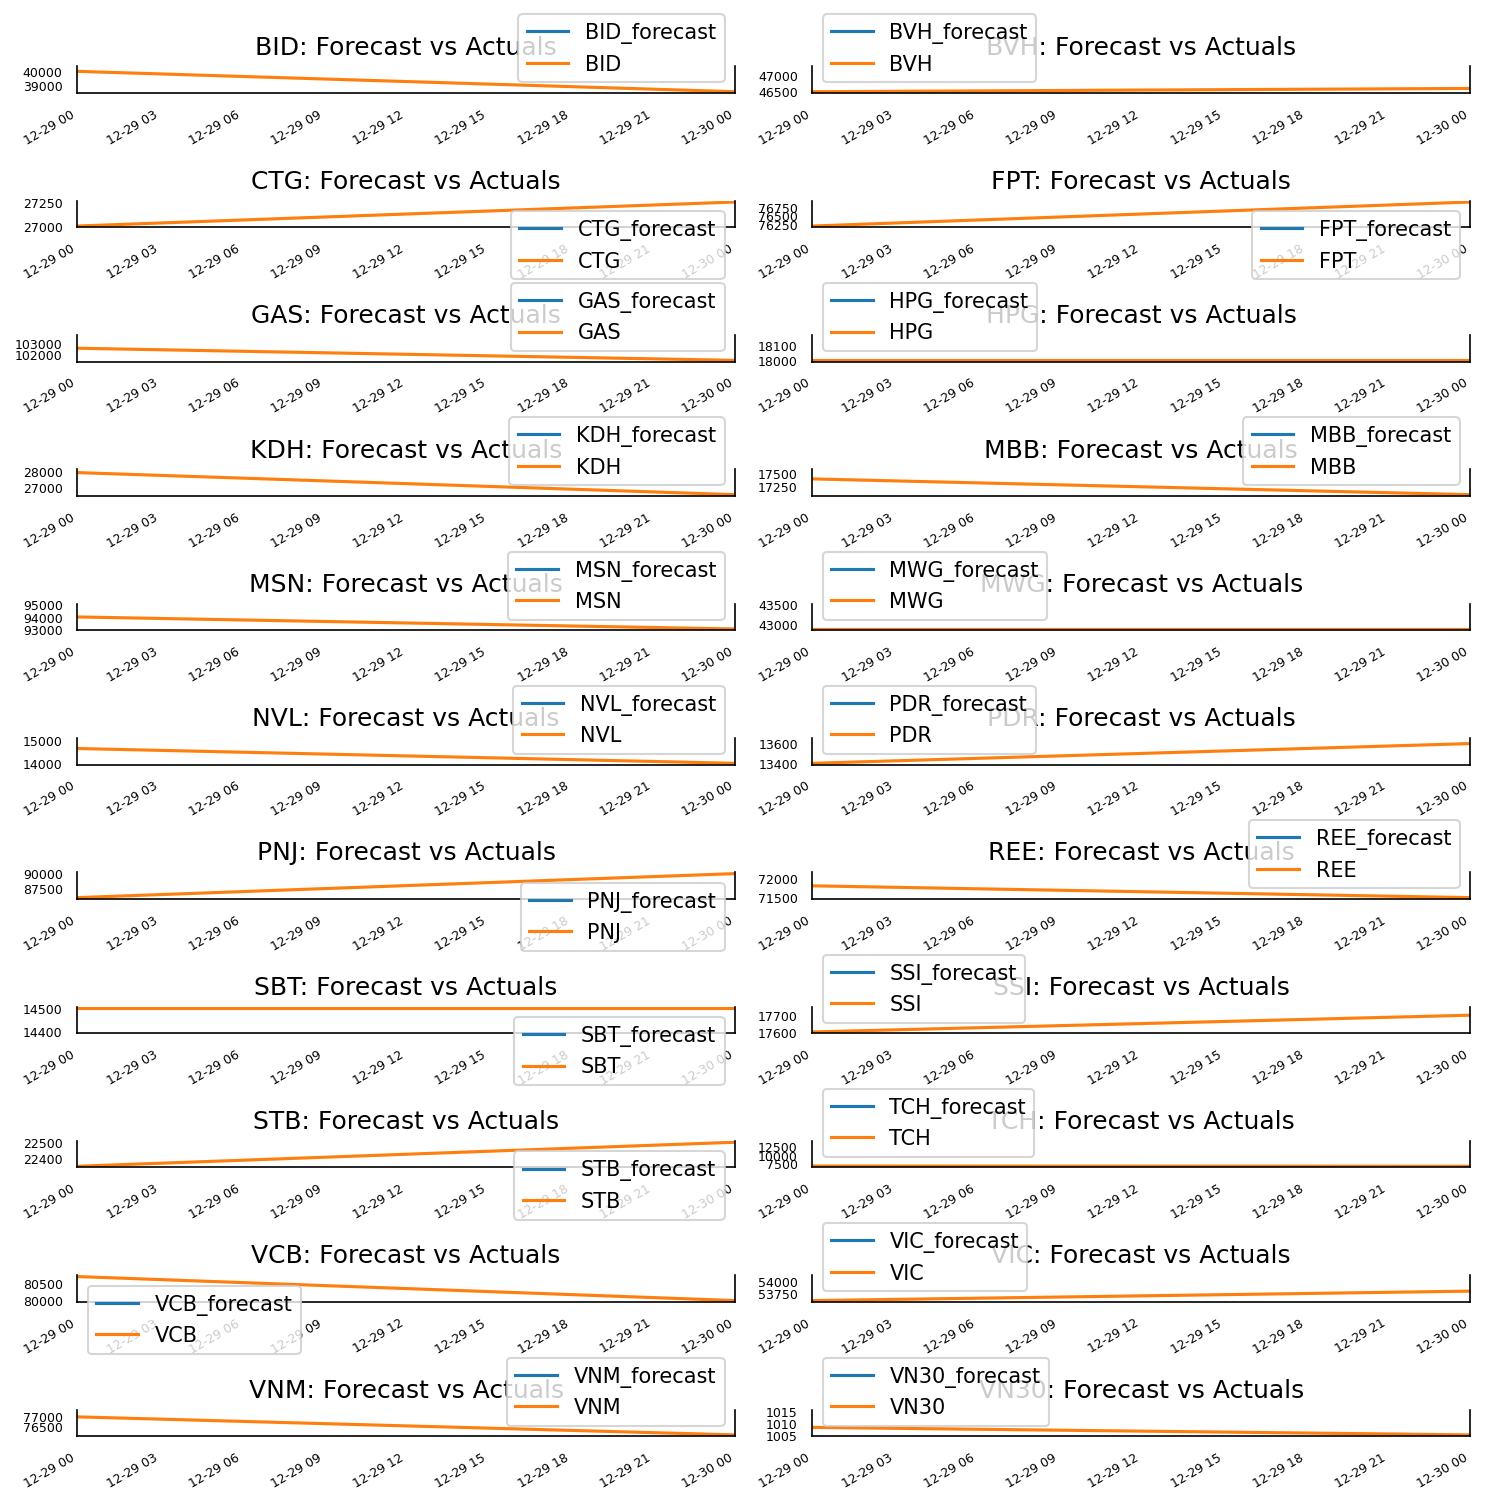

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    origin_df[col][start_index-lag_order:start_index+nobs].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [ ]:
start_index = 34
pred_df = pd.DataFrame(columns=VN30_df.columns)
for start_index in range(lag_order+1, len(df)-lag_order):
    forecast_input = df.values[(start_index - lag_order-1):start_index-1]

    fc = fitted_model.forecast(y=forecast_input, steps=1)
    df_forecast = pd.DataFrame(fc, index=origin_df[start_index:start_index+1].index, columns=df.columns + '_1d')

    df_results = invert_transformation(origin_df[(start_index - lag_order - 1):start_index], df_forecast, second_diff=False)
    pred_df = pd.concat([pred_df, df_results[[col+'_forecast' for col in VN30_df.columns]]])

In [ ]:
test_start_date = pred_df.index.min()

In [ ]:
test_end_date = pred_df.index.max()

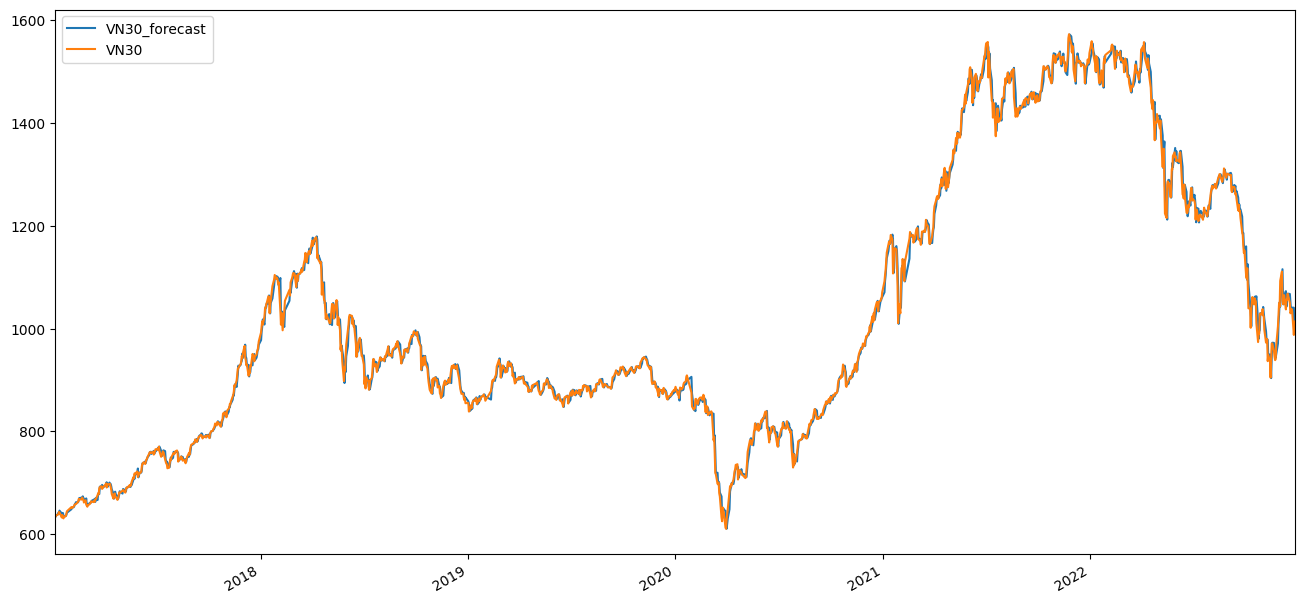

In [ ]:
pred_df[test_start_date:test_end_date]['VN30'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
origin_df[test_start_date:test_end_date]['VN30'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

In [ ]:
df_len = len(origin_df)
test_range = df_len - int(0.8*df_len)

In [ ]:
test_range

300

In [ ]:
pred_df[-test_range:]['VN30'+'_forecast']

2021-10-20    1509.947240
2021-10-21    1504.229129
2021-10-22    1493.204786
2021-10-25    1490.550697
2021-10-26    1477.498092
                 ...     
2022-12-22    1034.537386
2022-12-23    1040.771354
2022-12-26    1040.731744
2022-12-27     991.191582
2022-12-28    1009.719097
Name: VN30_forecast, Length: 300, dtype: float64

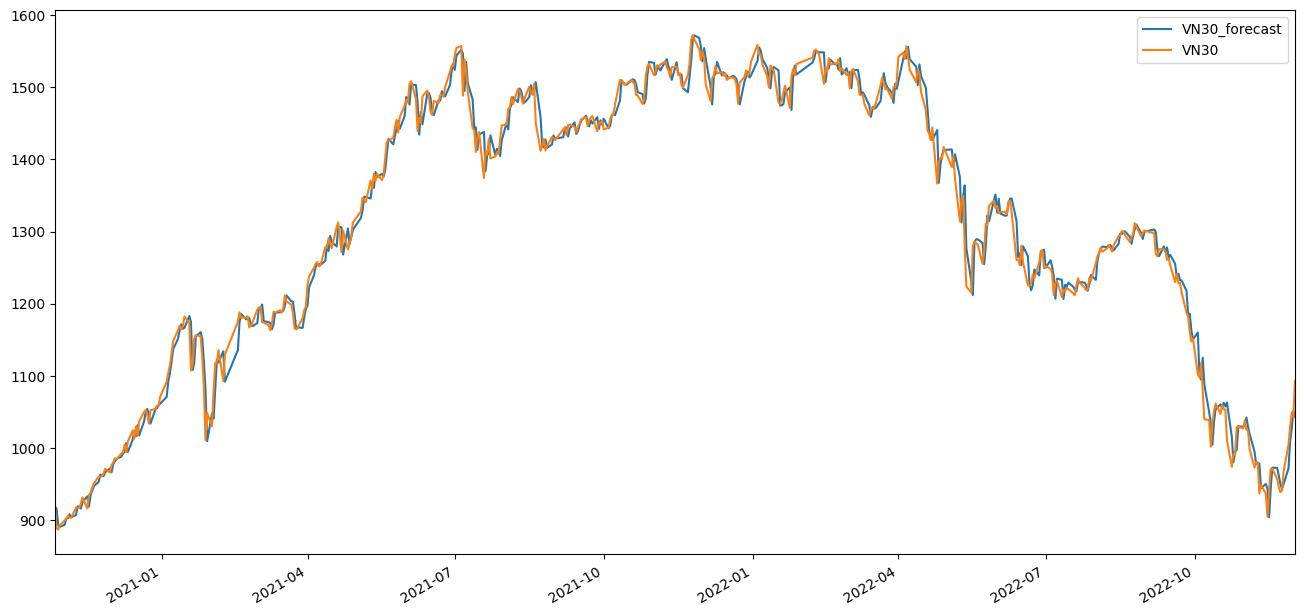

In [ ]:
pred_df['2020-10-27':'2022-12-02']['VN30'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
origin_df['2020-10-27':'2022-12-02']['VN30'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

In [ ]:
len(origin_df[lag_order+1: len(df)-lag_order])

1496

In [ ]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(pred_df['VN30_forecast'].values, 
origin_df[lag_order+1: len(df)-lag_order]['VN30'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.009
me     :  0.6118
mae    :  9.2983
mpe    :  0.0007
rmse   :  14.1037
corr   :  0.9985
minmax :  0.0089


In [ ]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(
    pred_df[-test_range:]['VN30_forecast'].values, 
    origin_df[-test_range:]['VN30'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0205
me     :  6.3862
mae    :  25.5564
mpe    :  0.0056
rmse   :  33.7994
corr   :  0.9853
minmax :  0.0199


In [ ]:
min_date = pred_df[-test_range:].index.min()
max_date = pred_df[-test_range:].index.max()

In [ ]:
lstnet = [1489.1891 , 1489.9209 , 1479.7115 , 1484.6711 , 1518.9275 ,
       1531.5386 , 1534.3811 , 1519.059  , 1523.3647 , 1531.6377 ,
       1530.171  , 1533.768  , 1535.9471 , 1529.0879 , 1525.5172 ,
       1516.9539 , 1530.0531 , 1530.6272 , 1518.8871 , 1521.2249 ,
       1505.7944 , 1500.3943 , 1518.1404 , 1536.8042 , 1566.9656 ,
       1574.8368 , 1569.2803 , 1555.0205 , 1539.8119 , 1550.1525 ,
       1542.0006 , 1504.5367 , 1480.1985 , 1515.0952 , 1519.4019 ,
       1531.4851 , 1522.6985 , 1522.7609 , 1519.6842 , 1520.8893 ,
       1511.8812 , 1513.3171 , 1514.5205 , 1512.5702 , 1506.5314 ,
       1479.73   , 1508.6694 , 1517.695  , 1526.3622 , 1517.7676 ,
       1519.6727 , 1538.4943 , 1561.0635 , 1547.5754 , 1544.239  ,
       1534.8345 , 1515.5332 , 1500.9238 , 1532.019  , 1528.348  ,
       1523.8181 , 1480.8818 , 1479.301  , 1485.0746 , 1493.9312 ,
       1505.0128 , 1471.9341 , 1517.6562 , 1528.9657 , 1518.5115 ,
       1534.6337 , 1543.9667 , 1551.7975 , 1553.1661 , 1553.427  ,
       1544.342  , 1505.352  , 1529.1742 , 1523.5966 , 1542.1085 ,
       1532.6995 , 1535.5732 , 1535.2808 , 1540.1277 , 1524.506  ,
       1525.3286 , 1521.9226 , 1520.2483 , 1498.238  , 1526.0885 ,
       1528.2317 , 1510.0376 , 1491.981  , 1492.5876 , 1492.5925 ,
       1476.8954 , 1463.3011 , 1469.9302 , 1474.0615 , 1472.1409 ,
       1478.6678 , 1506.9875 , 1515.4663 , 1506.735  , 1499.4818 ,
       1500.6268 , 1484.2766 , 1500.4623 , 1503.124  , 1509.8677 ,
       1543.3958 , 1551.667  , 1541.7029 , 1559.0621 , 1544.1754 ,
       1523.493  , 1508.4728 , 1526.872  , 1517.3737 , 1494.2498 ,
       1470.7972 , 1442.1255 , 1437.6945 , 1429.9005 , 1447.0518 ,
       1367.0369 , 1397.2953 , 1406.2319 , 1402.0256 , 1420.9833 ,
       1390.9496 , 1407.1449 , 1375.3143 , 1316.5417 , 1343.697  ,
       1353.181  , 1280.6215 , 1219.7299 , 1220.0232 , 1282.6135 ,
       1288.7194 , 1285.4624 , 1285.6565 , 1257.5941 , 1272.2333 ,
       1315.4207 , 1312.3607 , 1331.4918 , 1345.5503 , 1334.1147 ,
       1338.5726 , 1327.5632 , 1325.1063 , 1330.836  , 1326.9309 ,
       1339.8196 , 1344.3625 , 1328.1937 , 1260.7137 , 1260.2953 ,
       1256.0994 , 1283.1844 , 1258.5493 , 1226.5792 , 1227.1796 ,
       1228.2125 , 1245.9174 , 1237.7173 , 1259.0548 , 1276.1986 ,
       1274.9249 , 1251.2538 , 1252.4768 , 1250.1615 , 1242.2218 ,
       1214.1915 , 1229.8236 , 1233.3687 , 1210.03   , 1221.0797 ,
       1220.0686 , 1223.2556 , 1220.6335 , 1218.0417 , 1212.658  ,
       1225.687  , 1237.297  , 1229.9153 , 1225.7084 , 1219.5483 ,
       1220.9512 , 1239.2188 , 1234.6381 , 1256.3934 , 1267.5453 ,
       1273.2617 , 1279.0923 , 1272.7388 , 1279.2627 , 1282.0974 ,
       1278.6622 , 1273.116  , 1281.9578 , 1296.1635 , 1296.9124 ,
       1302.8413 , 1301.8351 , 1297.1097 , 1286.8942 , 1293.7212 ,
       1298.0211 , 1312.0044 , 1309.3463 , 1294.7499 , 1300.0922 ,
       1304.7278 , 1299.7623 , 1300.593  , 1271.1201 , 1265.512  ,
       1277.5688 , 1278.5742 , 1273.385  , 1262.3932 , 1265.5779 ,
       1254.9232 , 1231.7634 , 1242.4039 , 1229.9187 , 1229.8564 ,
       1217.0432 , 1189.0468 , 1183.3081 , 1163.2368 , 1148.9897 ,
       1153.0746 , 1104.7509 , 1096.7842 , 1120.5093 , 1085.0856 ,
       1037.6089 , 1041.0778 , 1005.02167, 1035.1018 , 1055.262  ,
       1062.9963 , 1048.4607 , 1061.5306 , 1057.3153 , 1053.6561 ,
       1012.1806 ,  972.4985 ,  991.06445,  992.6584 , 1030.1068 ,
       1029.7168 , 1030.1724 , 1042.5576 , 1025.7408 , 1026.7706 ,
        998.2351 ,  971.10583,  978.86774,  981.7917 ,  936.54535,
        949.3909 ,  941.82697,  906.41815,  943.15424,  975.44324,
        972.3769 ,  957.1485 ,  947.2559 ,  939.92706,  941.27576,
        970.0068 , 1006.738  , 1031.1204 , 1051.8977 , 1044.7957 ,
       1095.2805 , 1115.9391 , 1052.6404 , 1044.296  , 1066.9907 ,
       1064.9368 , 1032.9884 , 1060.6434 , 1059.4702 , 1067.8638 ,
       1069.39   , 1053.5315 , 1031.2455 , 1032.7078 , 1040.5038 ,
       1034.7623 ,  989.1772 , 1007.7476 , 1017.0591 , 1013.79126]

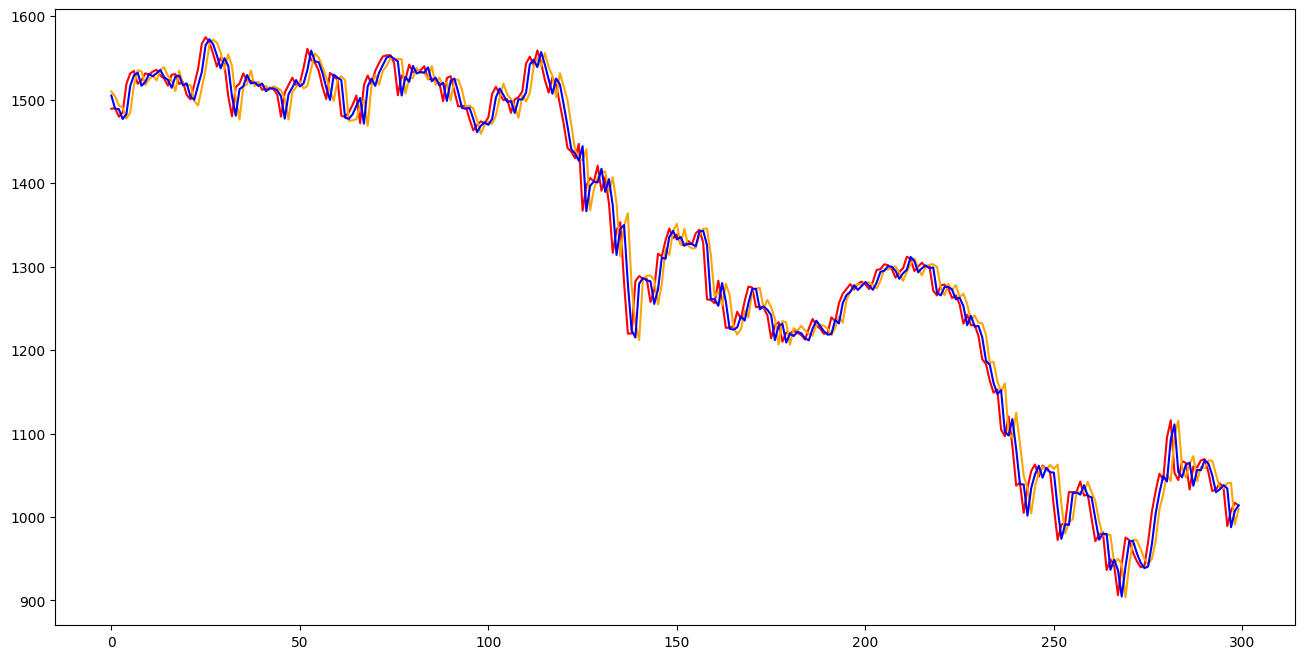

In [ ]:
plt.plot(lstnet, label="lstnet", color='red')
plt.plot(pred_df[min_date: max_date]['VN30'+'_forecast'].values, label="var", color='orange')
plt.plot(origin_df[min_date: max_date]['VN30'].values, label="true", color='blue')
plt.show()

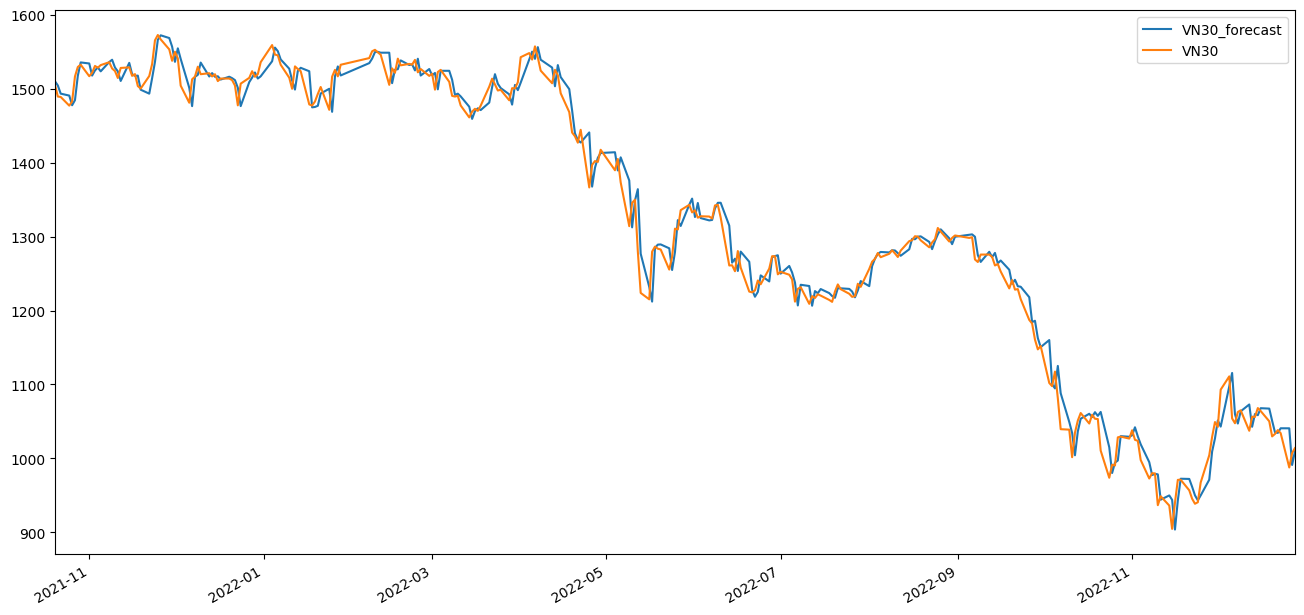

In [ ]:
pred_df[min_date: max_date]['VN30'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
origin_df[min_date: max_date]['VN30'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

In [ ]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(
    pred_df[min_date: max_date]['VN30_forecast'].values, 
    origin_df[min_date: max_date]['VN30'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0113
me     :  3.1169
mae    :  14.2216
mpe    :  0.0027
rmse   :  19.9501
corr   :  0.9948
minmax :  0.0111


In [ ]:
from datetime import timedelta

In [ ]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(
    origin_df[min_date-timedelta(days=1): max_date-timedelta(days=1)]['VN30'].values, 
    origin_df[min_date: max_date]['VN30'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.011
me     :  1.6441
mae    :  13.8366
mpe    :  0.0014
rmse   :  19.3908
corr   :  0.995
minmax :  0.0108
